In [63]:
from google.colab import files
uploaded = files.upload()


Saving kaggle_survey_2017_2021.csv.zip to kaggle_survey_2017_2021.csv.zip


In [64]:
import os

os.rename("kaggle_survey_2017_2021.csv.zip", "kaggle_survey.zip")


In [65]:
!unzip kaggle_survey.zip


Archive:  kaggle_survey.zip
replace kaggle_survey_2017_2021.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: kaggle_survey_2017_2021.csv  


In [66]:
import pandas as pd
df = pd.read_csv('kaggle_survey_2017_2021.csv', low_memory=False)
df.head()


,-,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,...,Q38_B_Part_1,Q38_B_Part_2,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_9,Q38_B_Part_11,Q38_B_OTHER
0,Year,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,2021,910,50-54,Man,India,Bachelorâ€™s degree,Other,5-10 years,Python,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021,784,50-54,Man,Indonesia,Masterâ€™s degree,Program/Project Manager,20+ years,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021,924,22-24,Man,Pakistan,Masterâ€™s degree,Software Engineer,1-3 years,Python,NaN,...,NaN,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN
4,2021,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
print("Shape of dataset:", df.shape)

df.info()

df.isnull().sum().sort_values(ascending=False)


Shape of dataset: (106302, 293)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106302 entries, 0 to 106301
Columns: 293 entries, - to Q38_B_OTHER
dtypes: object(293)
memory usage: 237.6+ MB


,0
Q38_B_Part_11,106301
Q34_B_Part_16,106301
Q9_Part_12,106301
Q7_Part_12,106301
Q14_Part_11,106301
...,...
Q4,2983
Q1,445
Q3,121
Q2,95


#### Data Cleaning

In [68]:
df.drop(columns=['-'], inplace=True)
df.dropna(thresh=5, inplace=True)


### Focus on a Single Year 2021

In [69]:
df_2021 = df[df['Time from Start to Finish (seconds)'].notnull()].copy()


In [70]:
print("Shape of 2021 data:", df_2021.shape)
df_2021.head()


Shape of 2021 data: (88304, 292)


,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q38_B_Part_1,Q38_B_Part_2,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_9,Q38_B_Part_11,Q38_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,910,50-54,Man,India,Bachelorâ€™s degree,Other,5-10 years,Python,R,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,784,50-54,Man,Indonesia,Masterâ€™s degree,Program/Project Manager,20+ years,NaN,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,924,22-24,Man,Pakistan,Masterâ€™s degree,Software Engineer,1-3 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN
4,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
df_2021.columns[:30]


Index(['Time from Start to Finish (seconds)', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5',
       'Q6', 'Q7_Part_1', 'Q7_Part_2', 'Q7_Part_3', 'Q7_Part_4', 'Q7_Part_5',
       'Q7_Part_6', 'Q7_Part_7', 'Q7_Part_8', 'Q7_Part_9', 'Q7_Part_10',
       'Q7_Part_11', 'Q7_Part_12', 'Q7_OTHER', 'Q8', 'Q9_Part_1', 'Q9_Part_2',
       'Q9_Part_3', 'Q9_Part_5', 'Q9_Part_6', 'Q9_Part_7', 'Q9_Part_8',
       'Q9_Part_9', 'Q9_Part_10'],
      dtype='object')

In [72]:
df_2021.rename(columns={
    'Q1': 'Age',
    'Q2': 'Gender',
    'Q3': 'Country',
    'Q4': 'Education',
    'Q5': 'Job Title',
    'Q6': 'Experience',
    'Q7_Part_1': 'Python',
    'Q7_Part_2': 'R',
    'Q7_Part_3': 'SQL',
    'Q7_Part_4': 'C',
    'Q7_Part_5': 'C++',
    'Q24': 'Salary'
}, inplace=True)


In [73]:
print(df_2021['Q25'].value_counts())


Q25
$0-999                                                          7010
I do not wish to disclose my approximate yearly compensation    4756
0-10,000                                                        4398
10,000-14,999                                                   2448
1,000-1,999                                                     2149
100,000-124,999                                                 2048
30,000-39,999                                                   2009
40,000-49,999                                                   1959
10-20,000                                                       1937
50,000-59,999                                                   1911
5,000-7,499                                                     1723
15,000-19,999                                                   1551
60,000-69,999                                                   1535
20,000-24,999                                                   1517
20-30,000                     

In [74]:
df_salary = df_2021[~df_2021['Q25'].isin([
    "I do not wish to disclose my approximate yearly compensation",
    "What is your current yearly compensation (approximate $USD)?"
])]

In [75]:
df_salary['Q25'].unique()


array(['25,000-29,999', '60,000-69,999', '$0-999', '30,000-39,999', nan,
       '15,000-19,999', '70,000-79,999', '2,000-2,999', '10,000-14,999',
       '5,000-7,499', '20,000-24,999', '1,000-1,999', '100,000-124,999',
       '7,500-9,999', '4,000-4,999', '40,000-49,999', '50,000-59,999',
       '3,000-3,999', '300,000-499,999', '200,000-249,999',
       '125,000-149,999', '250,000-299,999', '80,000-89,999',
       '90,000-99,999', '150,000-199,999', '>$1,000,000',
       '$500,000-999,999', '> $500,000', '300,000-500,000', '10-20,000',
       '0-10,000', '20-30,000', '125-150,000', '30-40,000', '50-60,000',
       '100-125,000', '90-100,000', '70-80,000', '80-90,000', '60-70,000',
       '400-500,000', '40-50,000', '150-200,000', '500,000+',
       '300-400,000', '200-250,000', '250-300,000'], dtype=object)

In [76]:
def simplify_salary(s):
    if pd.isna(s):
        return 'Other'
    s = str(s).replace('$', '').replace(',', '').strip()
    if any(x in s for x in ['0-999', '0-10000', '1000-1999', '10000-14999']):
        return '<15k'
    elif any(x in s for x in ['15000-19999', '20000-24999']):
        return '15k–25k'
    elif any(x in s for x in ['25000-29999', '30000-39999']):
        return '25k–40k'
    elif any(x in s for x in ['40000-49999', '50000-59999']):
        return '40k–60k'
    elif any(x in s for x in ['60000-69999', '70000-79999', '80000-89999']):
        return '60k–90k'
    elif any(x in s for x in ['90000-99999', '100000-124999']):
        return '90k–125k'
    elif any(x in s for x in ['125000-149999', '150000-199999']):
        return '125k–200k'
    elif any(x in s for x in ['200000-249999', '250000-299999', '300000-499999', '500000', '500000+', '>500000', '>1000000']):
        return '200k+'
    else:
        return 'Other'

df_salary.loc[:, 'Salary_Group'] = df_salary['Q25'].apply(simplify_salary)


/tmp/ipython-input-76-840605207.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_salary.loc[:, 'Salary_Group'] = df_salary['Q25'].apply(simplify_salary)


/tmp/ipython-input-77-3728219653.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


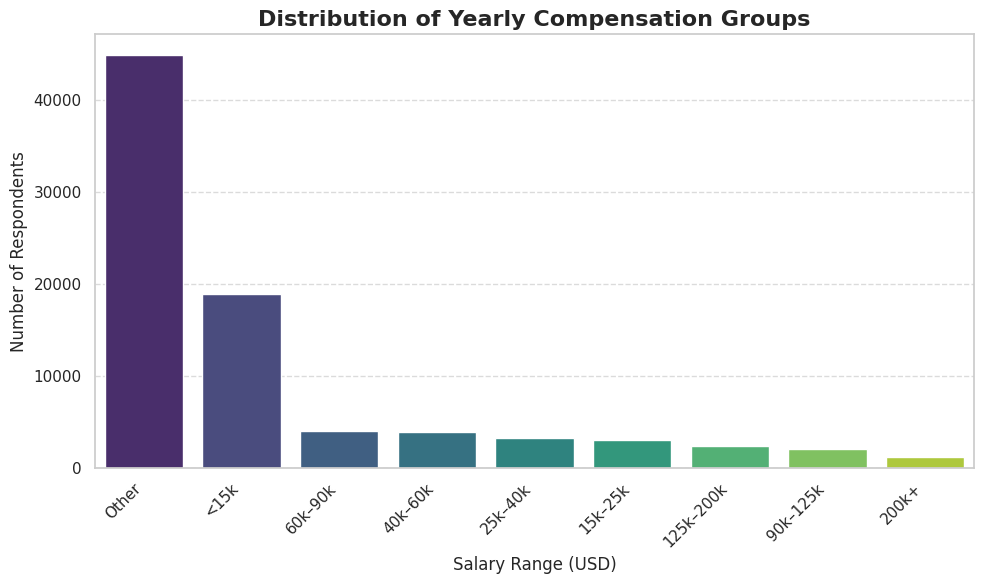

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.countplot(
    data=df_salary,
    x='Salary_Group',
    order=df_salary['Salary_Group'].value_counts().index,
    palette='viridis'
)

plt.title('Distribution of Yearly Compensation Groups', fontsize=16, fontweight='bold')
plt.xlabel('Salary Range (USD)', fontsize=12)
plt.ylabel('Number of Respondents', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [78]:
print(df_salary['Gender'].value_counts(dropna=False))


Gender
Man                        36044
Male                       31158
Woman                       8654
Female                      6227
Prefer not to say           1124
Prefer to self-describe      202
Nonbinary                    138
Name: count, dtype: int64


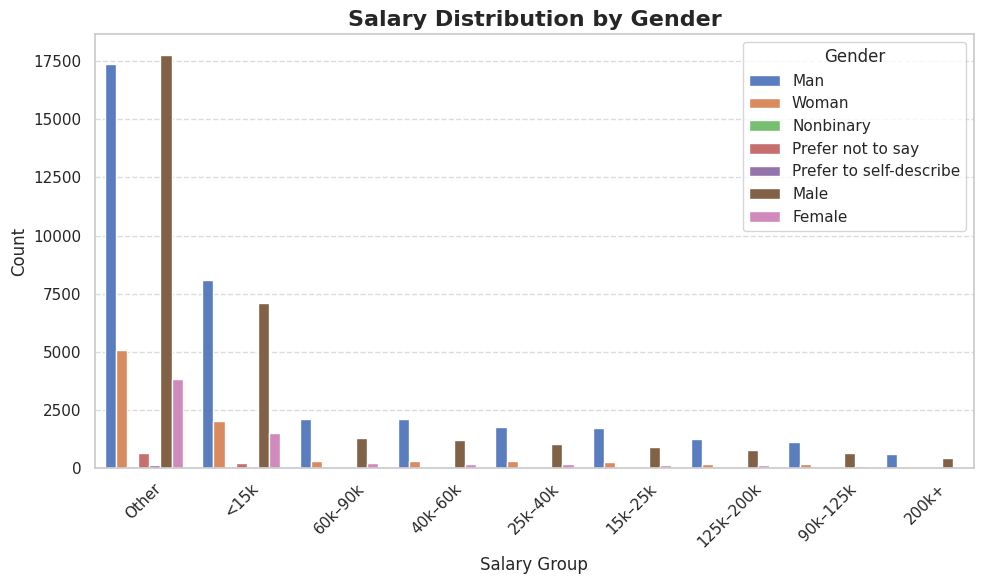

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

sns.countplot(
    data=df_salary,
    x='Salary_Group',
    hue='Gender',
    order=df_salary['Salary_Group'].value_counts().index,
    palette='muted'
)

plt.title('Salary Distribution by Gender', fontsize=16, fontweight='bold')
plt.xlabel('Salary Group', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [80]:
print(df_salary['Gender'].value_counts(dropna=False))


Gender
Man                        36044
Male                       31158
Woman                       8654
Female                      6227
Prefer not to say           1124
Prefer to self-describe      202
Nonbinary                    138
Name: count, dtype: int64


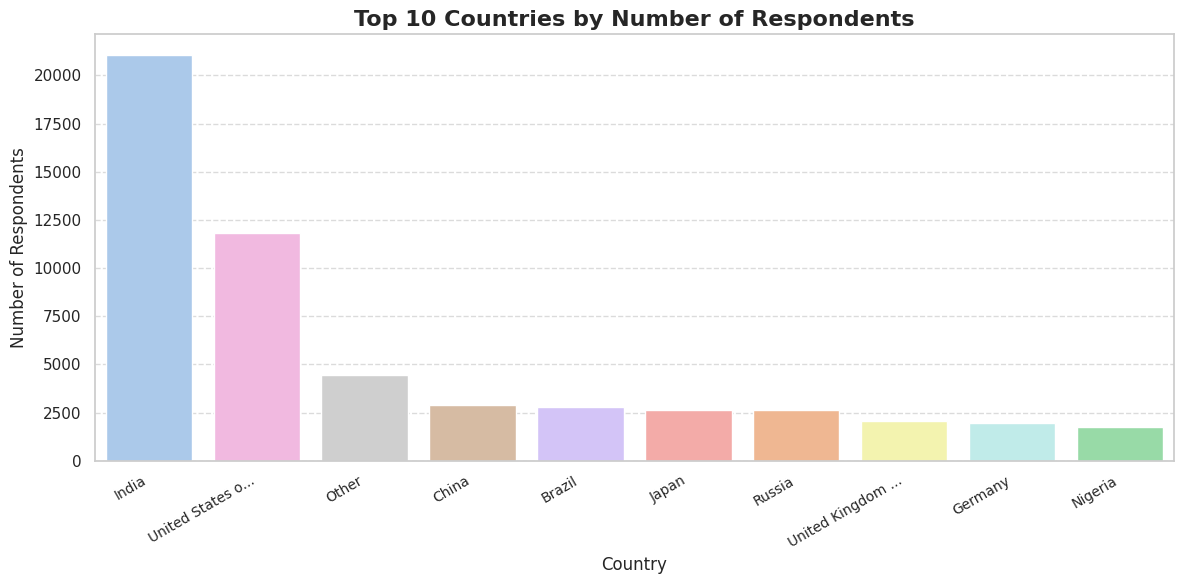

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

plt.figure(figsize=(12, 6))

top_countries = df_salary['Country'].value_counts().nlargest(10).index

ax = sns.countplot(
    data=df_salary[df_salary['Country'].isin(top_countries)],
    x='Country',
    hue='Country',
    order=top_countries,
    palette='pastel',
    dodge=False,
    legend=False
)

plt.title('Top 10 Countries by Number of Respondents', fontsize=16, fontweight='bold')
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Respondents', fontsize=12)
plt.xticks(rotation=30, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

labels = [label.get_text()[:15] + '...' if len(label.get_text()) > 18 else label.get_text()
          for label in ax.get_xticklabels()]
ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels)

plt.tight_layout()
plt.show()


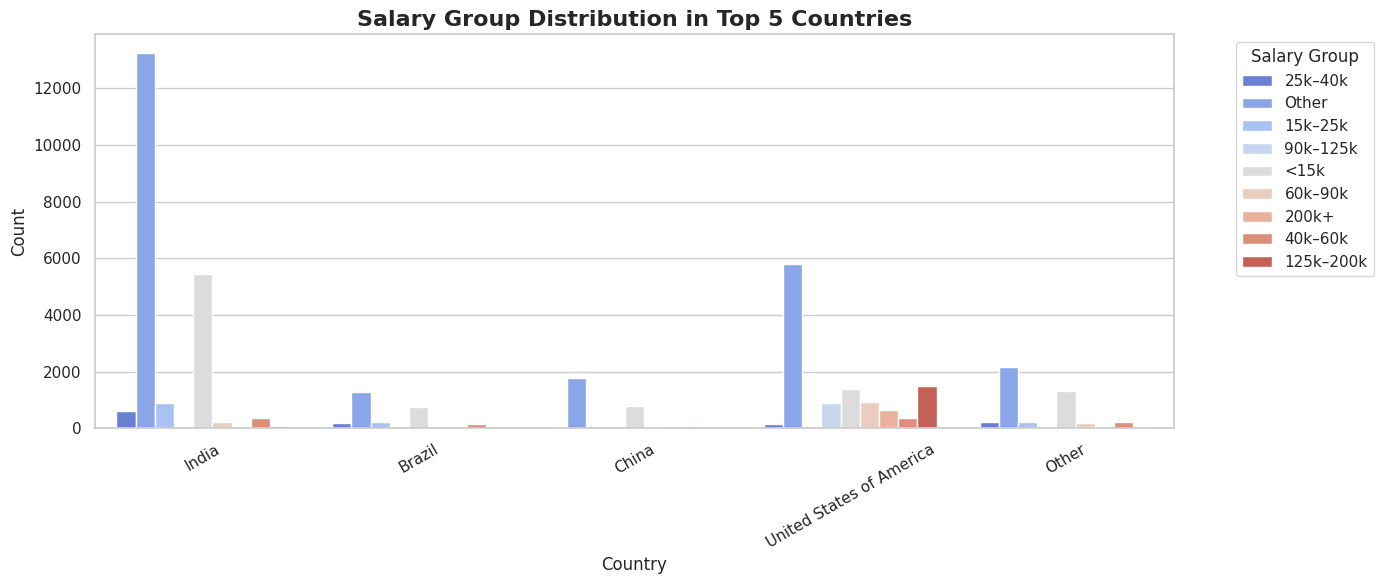

In [82]:
plt.figure(figsize=(14, 6))

top_countries = df_salary['Country'].value_counts().nlargest(5).index
subset = df_salary[df_salary['Country'].isin(top_countries)]

sns.countplot(
    data=subset,
    x='Country',
    hue='Salary_Group',
    palette='coolwarm'
)

plt.title('Salary Group Distribution in Top 5 Countries', fontsize=16, fontweight='bold')
plt.xlabel('Country', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Salary Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


In [83]:
print(df_salary['Experience'].value_counts())


Experience
3-5 years                                               15322
< 1 years                                               13022
1-2 years                                               12804
5-10 years                                               9391
1-3 years                                                7874
10-20 years                                              5902
20+ years                                                3765
< 1 year                                                 3489
I have never written code                                3021
I have never written code but I want to learn             615
20-30 years                                               254
30-40 years                                                95
40+ years                                                  46
I have never written code and I do not want to learn       35
Name: count, dtype: int64


/tmp/ipython-input-84-613805039.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exp_df['Experience_Clean'] = exp_df['Experience'].apply(lambda x: x if len(x) <= 20 else x[:20] + '...')


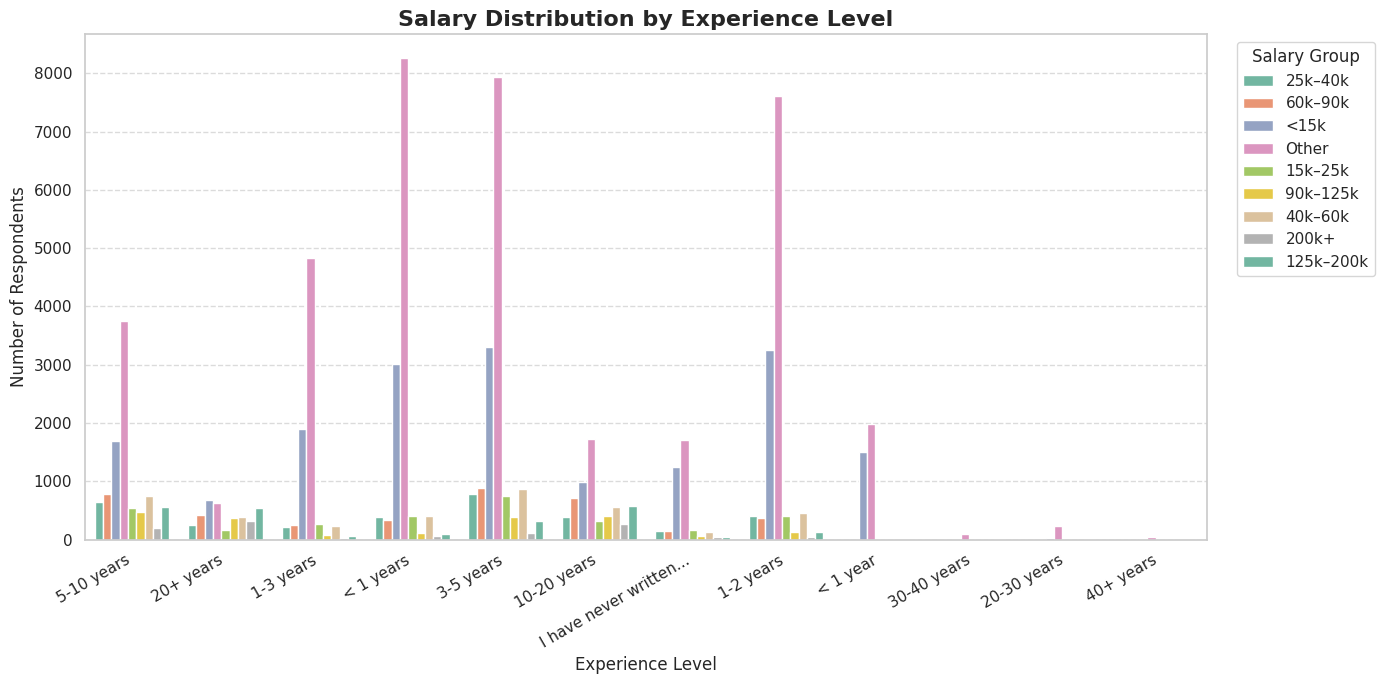

In [84]:
plt.figure(figsize=(14, 7))

exp_df = df_salary.dropna(subset=['Experience', 'Salary_Group'])

# Truncate long experience labels
exp_df['Experience_Clean'] = exp_df['Experience'].apply(lambda x: x if len(x) <= 20 else x[:20] + '...')

sns.countplot(
    data=exp_df,
    x='Experience_Clean',
    hue='Salary_Group',
    palette='Set2'
)

plt.title('Salary Distribution by Experience Level', fontsize=16, fontweight='bold')
plt.xlabel('Experience Level', fontsize=12)
plt.ylabel('Number of Respondents', fontsize=12)
plt.xticks(rotation=30, ha='right')
plt.legend(title='Salary Group', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [85]:
df_job = df_salary.dropna(subset=['Job Title', 'Salary_Group'])

top_jobs = df_job['Job Title'].value_counts().nlargest(10).index

df_job_filtered = df_job[df_job['Job Title'].isin(top_jobs)]

df_job_filtered['Job Title'].value_counts()


,count
Job Title,
Student,19512
Data Scientist,13861
Software Engineer,9656
Data Analyst,6948
Other,6907
Research Scientist,5165
Currently not employed,3638
Business Analyst,3177
Machine Learning Engineer,2581


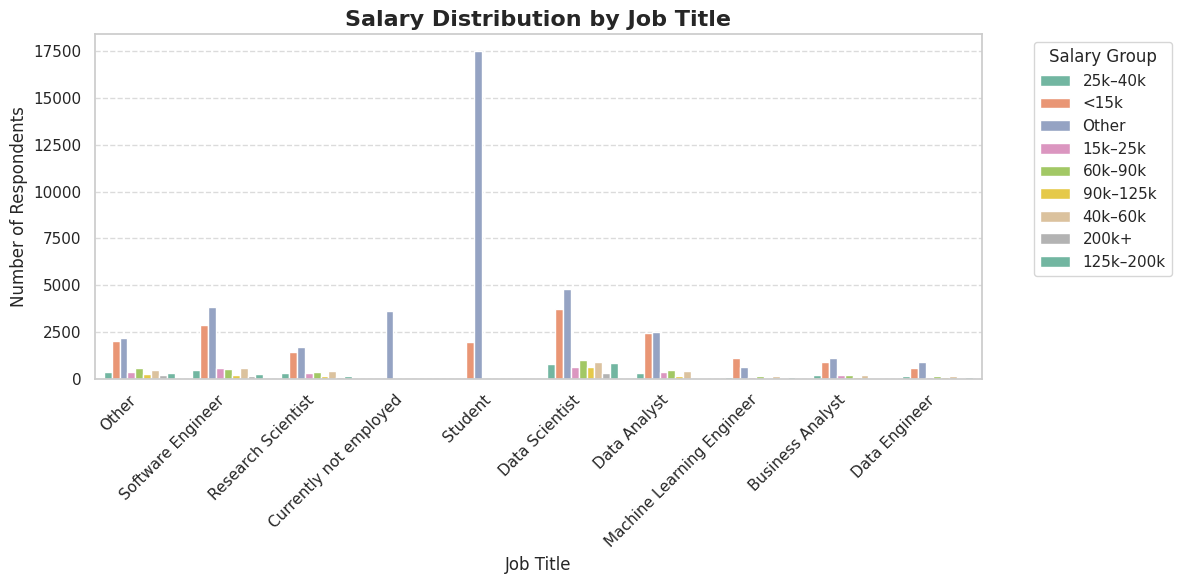

In [86]:
plt.figure(figsize=(12, 6))
sns.countplot(
    data=df_job_filtered,
    x='Job Title',
    hue='Salary_Group',
    palette='Set2'
)

plt.title('Salary Distribution by Job Title', fontsize=16, fontweight='bold')
plt.xlabel('Job Title', fontsize=12)
plt.ylabel('Number of Respondents', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Salary Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [87]:
df_country = df_salary.dropna(subset=['Country', 'Salary_Group'])

top_countries = df_country['Country'].value_counts().nlargest(10).index

df_country_filtered = df_country[df_country['Country'].isin(top_countries)]

df_country_filtered['Country'].value_counts()


,count
Country,
India,21076
United States of America,11815
Other,4463
China,2897
Brazil,2767
Japan,2628
Russia,2605
United Kingdom of Great Britain and Northern Ireland,2085
Germany,1970


/tmp/ipython-input-88-3013842251.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(


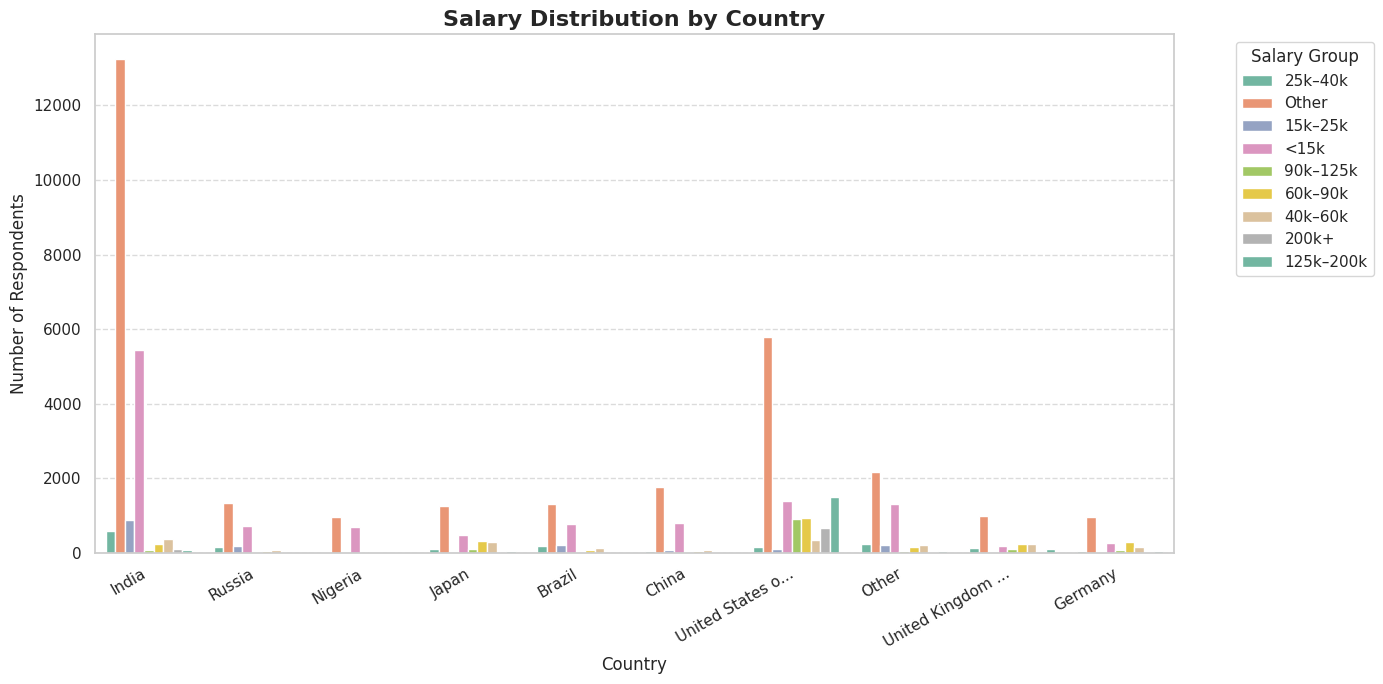

In [88]:
plt.figure(figsize=(14, 7))
ax = sns.countplot(
    data=df_country_filtered,
    x='Country',
    hue='Salary_Group',
    palette='Set2'
)
plt.title('Salary Distribution by Country', fontsize=16, fontweight='bold')
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Respondents', fontsize=12)

ax.set_xticklabels(
    [label.get_text()[:15] + '...' if len(label.get_text()) > 18 else label.get_text() for label in ax.get_xticklabels()],
    rotation=30,
    ha='right'
)

plt.legend(title='Salary Group', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
